Vamos utilizar a base de dados já baixada anteriormentente. 

A base de dados são das seguintes empresas: Procter & Gamble, Microsoft, Ford, General Electric

In [1]:
import pandas as pd
import yfinance as yf  # Para baixar os dados financeiros
import numpy as np
import matplotlib.pyplot as plt

tickers = ['PG', 'MSFT', 'F', 'GE']
new_data = pd.DataFrame()

for t in tickers:
    new_data[t] = yf.download(t, start='1995-01-01')['Close']  # Apenas o preço de fechamento

print(new_data.head())

#Nome new_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  PG      MSFT         F         GE
Date                                               
1995-01-03  7.441167  2.319452  3.569731  20.200659
1995-01-04  7.381515  2.336313  3.665780  20.200659
1995-01-05  7.277134  2.297775  3.633762  20.250177
1995-01-06  7.292043  2.336313  3.633762  20.151150
1995-01-09  7.262219  2.321862  3.697793  19.953110


In [2]:
new_data

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.441167,2.319452,3.569731,20.200659
1995-01-04,7.381515,2.336313,3.665780,20.200659
1995-01-05,7.277134,2.297775,3.633762,20.250177
1995-01-06,7.292043,2.336313,3.633762,20.151150
1995-01-09,7.262219,2.321862,3.697793,19.953110
...,...,...,...,...
2024-12-26,170.160004,438.109985,10.070000,171.869995
2024-12-27,169.529999,430.529999,10.030000,170.080002
2024-12-30,167.089996,424.829987,9.880000,168.100006


Primeiro vamos criar um grafico de linhas para analisar os dados. 
A fórmula para normalizar os dados é:

\[
\text{Valor Normalizado} = \left( \frac{P_1}{P_0} \right) \times 100
\]

Onde:
- \( P_1 \) é o valor atual.
- \( P_0 \) é o valor inicial.


O indexador "iloc[0]" extrai os primeiros dados das tabelas.

In [3]:
new_data.iloc[0]

PG       7.441167
MSFT     2.319452
F        3.569731
GE      20.200659
Name: 1995-01-03 00:00:00, dtype: float64

Agora podemos aplicar a formular para normalizar os dados

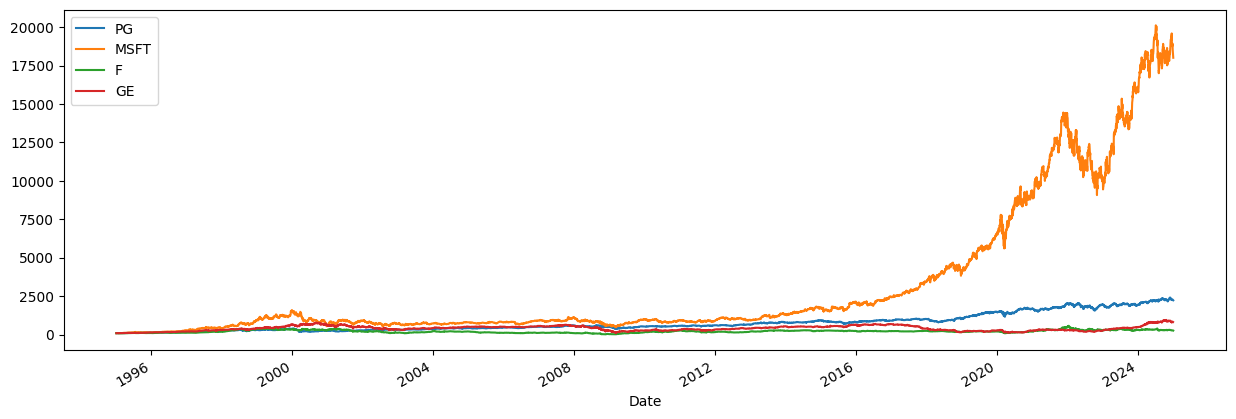

In [4]:
# Normalizar os dados (divide por o primeiro valor e multiplica por 100)
(new_data / new_data.iloc[0] * 100).plot(figsize=(15, 5))

# Mostrar o gráfico
plt.show()

Agora vamos camparar elas sem está normalizadas. Para vemos a diferença, vale lembrar que é melhor analisar as carteiras normalizadas. Então o exemplo é o qualificado para a analise dessas ações. 

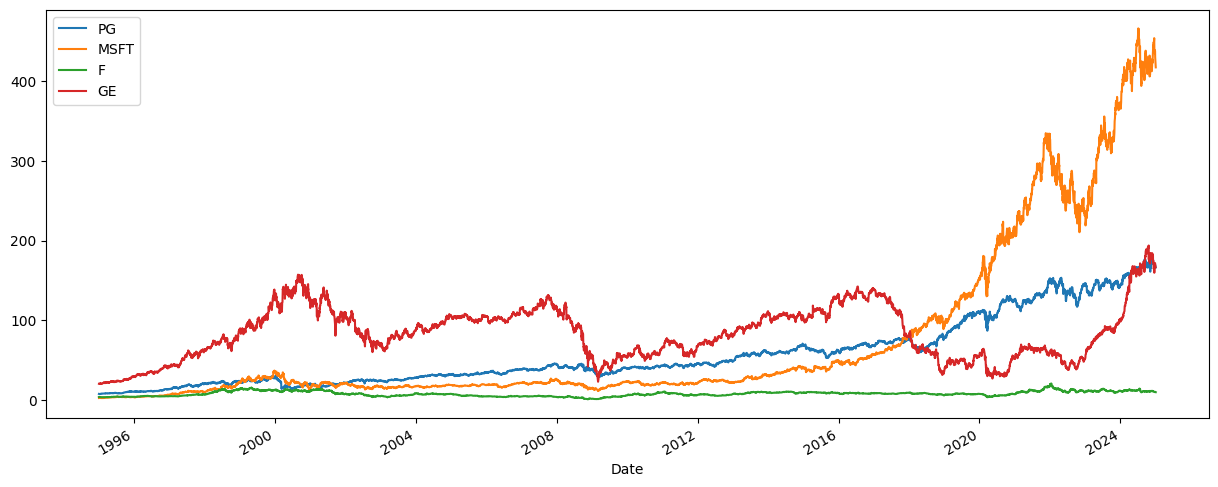

In [5]:
new_data.plot(figsize= (15,6))
plt.show()

Agora vamos calcular o retorno simples dessas ações.

In [6]:
txreturns = (new_data / new_data.shift(1)) - 1
txreturns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008017,0.007269,0.026907,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


Colocando os pesos

Vamos assumir pesos iguais paras as ações, ou seja, cada ação representa 25% da carteira. 

In [7]:
weights = np.array([0.25, 0.25, 0.25,0.25])

O indexador "iloc[0]" extrai os primeiros dados das tabelas. 

In [8]:
new_data.iloc[0]

PG       7.441167
MSFT     2.319452
F        3.569731
GE      20.200659
Name: 1995-01-03 00:00:00, dtype: float64

Agora podemos aplicar a formular para normalizar os dados

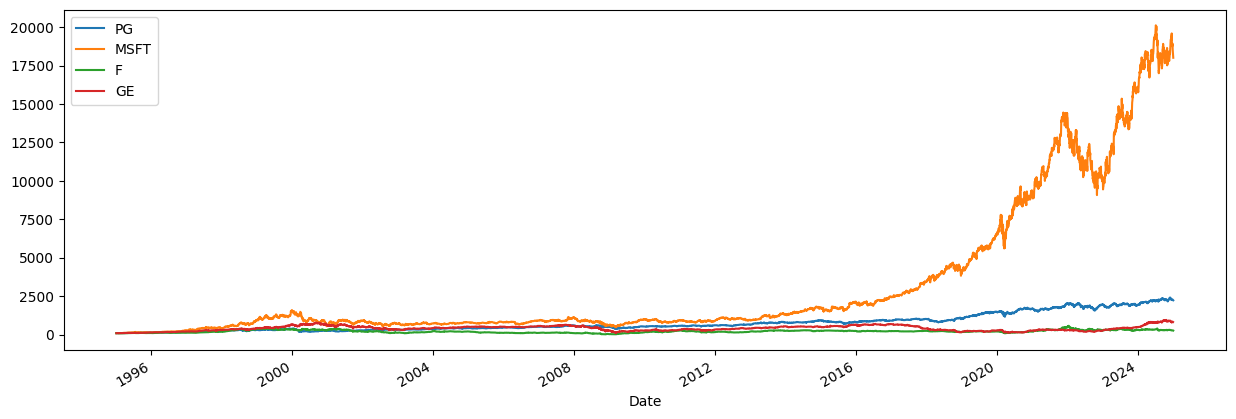

In [9]:
# Normalizar os dados (divide por o primeiro valor e multiplica por 100)
(new_data / new_data.iloc[0] * 100).plot(figsize=(15, 5))

# Mostrar o gráfico
plt.show()

Agora vamos camparar elas sem está normalizadas. Para vemos a diferença, vale lembrar que é melhor analisar as carteiras normalizadas. Então o exemplo é o qualificado para a analise dessas ações. 

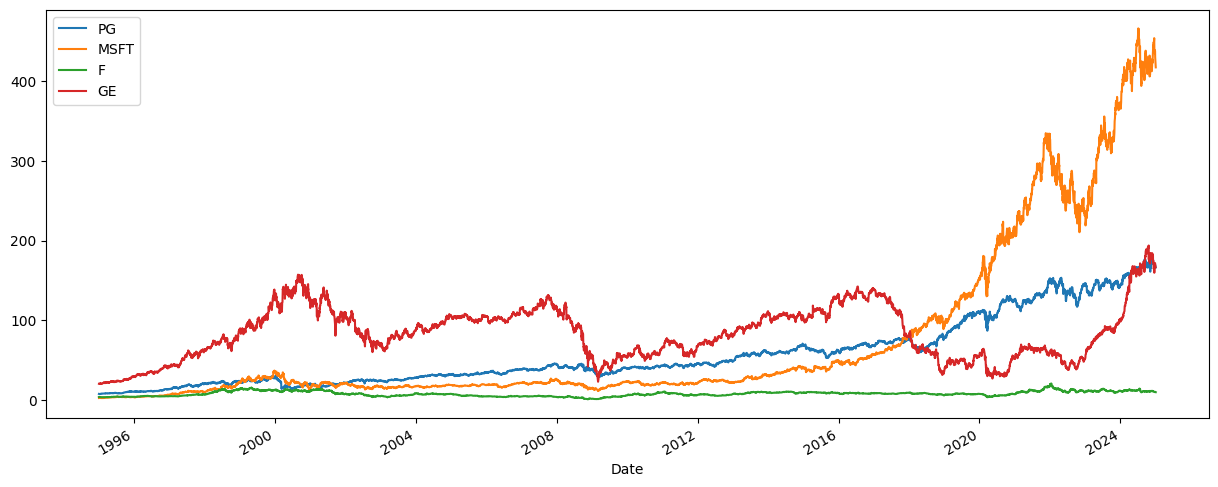

In [10]:
new_data.plot(figsize= (15,6))
plt.show()

Agora vamos calcular o retorno simples dessas ações.

In [11]:
txreturns = (new_data / new_data.shift(1)) - 1
txreturns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008017,0.007269,0.026907,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


Vamos assumir pesos iguais paras as ações, ou seja, cada ação representa 25% da carteira. 

In [12]:
weights = np.array([0.25, 0.25, 0.25,0.25])

Vamos multiplicar o preço de cada ação pelo peso de cada retorno.

In [13]:
np.dot (txreturns, weights)

array([        nan,  0.00653982, -0.00922974, ..., -0.01355723,
       -0.00256394,         nan])

O resultado não saiu da forma que pode ser averiguada.
Calculando a taxa de retorno anual das ações. 
Lembrando que tiramos a média das ações e multiplicamos pelos provaveis dias uteis no ano. 

In [14]:
annual_return =  txreturns.mean () * 250
annual_return

PG      0.126944
MSFT    0.219763
F       0.113026
GE      0.120620
dtype: float64

In [15]:
np.dot(annual_return,weights)

0.14508827846841693

Calculo do retorno do portifólio

In [16]:
pfolio_1 = str(round(np.dot(annual_return, weights), 5) * 100) + '%'
print(pfolio_1)

14.509%


Caso queira comparar com outras pesos, basta analisar por pesos diferentes. E assim comparar seus resultados. 

In [17]:
weights_2 = np.array([0.4,0.4, 0.15,0.05])

In [18]:
pfolio_2 = str(round(np.dot(annual_return,weights_2), 5 ) *100) + '%'
print (pfolio_1)
print (pfolio_2)

14.509%
16.167%
